LOAD DATA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


DATA PREPROCESSING DAN DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}") 
print(f"missing data: {sum(df.isna().sum())}")

Rows: 200, Columns: 5
Duplicates: 0
missing data: 0


CEK OUTLIER DATA DENGAN INTERQUARTIL RANGE 

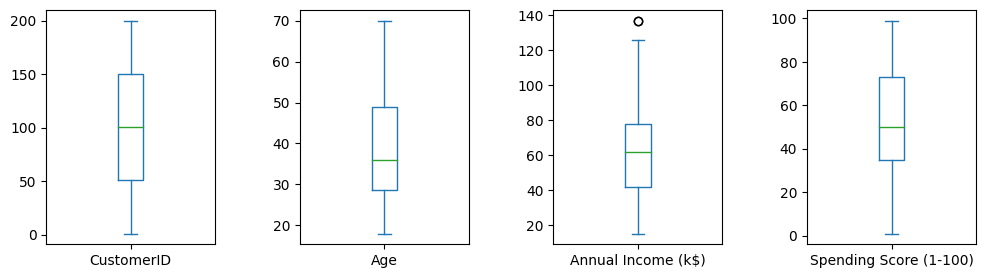

In [7]:
#TERDAPAT DATA MENCURIGAKAN PADA KOLOM ANNUAL INCOME
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);
plt.show()


In [8]:
#HITUNG Q1 DAN Q3
Q1 = np.percentile(df['Annual Income (k$)'], 25)
Q3 = np.percentile(df['Annual Income (k$)'], 75)


In [9]:
#HITUNG IQR
IQR = Q3 - Q1
IQR

36.5

In [10]:
# Tentukan Batas Bawah Dan Batas Atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
#IDENTIFIKASI OUTLIER
outliers = df['Annual Income (k$)'][(df['Annual Income (k$)'] < lower_bound)| (df['Annual Income (k$)'] > upper_bound)]

if not outliers.empty:
    print("outliers berdasarkan IQR:")
    print(outliers)
else:
    print("Tidak ada outlier", outliers)

outliers berdasarkan IQR:
198    137
199    137
Name: Annual Income (k$), dtype: int64


HANDLE OUTLIER 

In [12]:
df['Annual Income (k$)'] = np.where((df['Annual Income (k$)'] < lower_bound), lower_bound, df['Annual Income (k$)'])
df['Annual Income (k$)'] = np.where((df['Annual Income (k$)'] > upper_bound), upper_bound, df['Annual Income (k$)'])

In [13]:
#IDENTIFIKASI OUTLIER
Cek_outliers = df['Annual Income (k$)'][(df['Annual Income (k$)'] < lower_bound)| (df['Annual Income (k$)'] > upper_bound)]

if not Cek_outliers.empty:
    print("outliers berdasarkan IQR:")
    print(Cek_outliers)
else:
    print("Tidak ada outlier", Cek_outliers)

Tidak ada outlier Series([], Name: Annual Income (k$), dtype: float64)


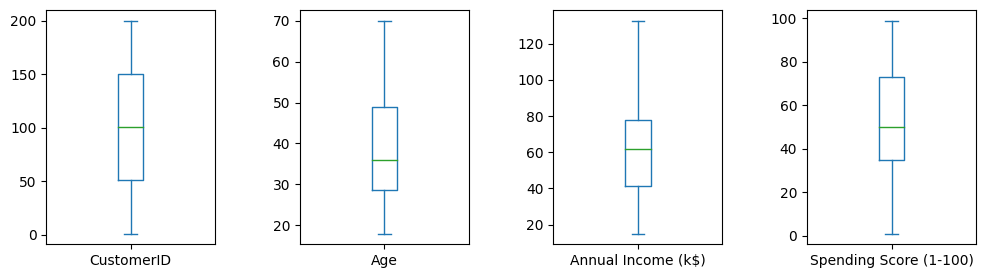

In [14]:
#OUTLIER SOLVE
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);
plt.show()


NEW FEATURES ( NEW COLUMNS )

In [15]:
df['Kategori Usia'] = df['Age'].apply(lambda x: 'Muda' if x <= 28 else ('Dewasa' if x <= 35 else ('Dewasa Akhir' if x <= 50 else "Lansia")) )
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kategori Usia
0,1,Male,19,15.00,39,Muda
1,2,Male,21,15.00,81,Muda
2,3,Female,20,16.00,6,Muda
3,4,Female,23,16.00,77,Muda
4,5,Female,31,17.00,40,Dewasa
...,...,...,...,...,...,...
195,196,Female,35,120.00,79,Dewasa
196,197,Female,45,126.00,28,Dewasa Akhir
197,198,Male,32,126.00,74,Dewasa
198,199,Male,32,132.75,18,Dewasa


In [16]:
df['Kategori Usia'].value_counts()

Kategori Usia
Dewasa Akhir    62
Muda            50
Dewasa          48
Lansia          40
Name: count, dtype: int64

DISTRIBUSI DATA

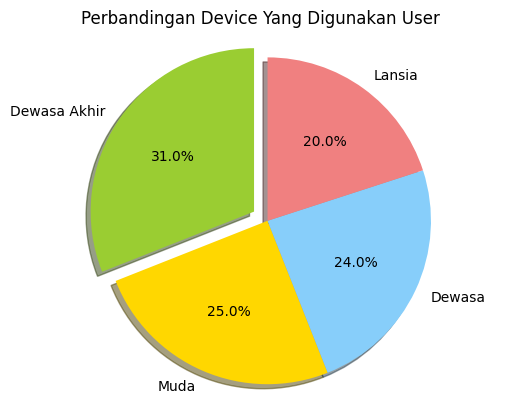

In [17]:
df_piechart = df['Kategori Usia'].value_counts()

labels = df_piechart.index
quantity = df_piechart.values
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0, 0)

plt.title('Perbandingan Device Yang Digunakan User')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

plt.axis('equal')
plt.show()

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


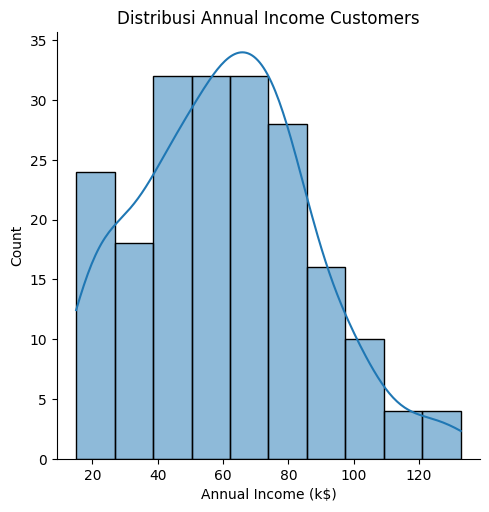

In [18]:
sns.displot ( x = 'Annual Income (k$)', kde = True, data = df)
plt.title("Distribusi Annual Income Customers")
plt.show()

LABEL ENCODER

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping1 = {'Male': 0, 'Female': 1}
mapping2 = {'Muda': 0, 'Dewasa': 1, 'Dewasa Akhir': 2, 'Lansia' : 3}
df['Gender'] = le.fit_transform(df['Gender'].map(mapping1))
df['Kategori Usia'] = le.fit_transform(df['Kategori Usia'].map(mapping2))
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kategori Usia
0,1,0,19,15.00,39,0
1,2,0,21,15.00,81,0
2,3,1,20,16.00,6,0
3,4,1,23,16.00,77,0
4,5,1,31,17.00,40,1
...,...,...,...,...,...,...
195,196,1,35,120.00,79,1
196,197,1,45,126.00,28,2
197,198,0,32,126.00,74,1
198,199,0,32,132.75,18,1


In [20]:
df = df.drop(["CustomerID"], axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Kategori Usia
0,0,19,15.00,39,0
1,0,21,15.00,81,0
2,1,20,16.00,6,0
3,1,23,16.00,77,0
4,1,31,17.00,40,1
...,...,...,...,...,...
195,1,35,120.00,79,1
196,1,45,126.00,28,2
197,0,32,126.00,74,1
198,0,32,132.75,18,1


KORELASI DATA DENGAN HEATMAPS

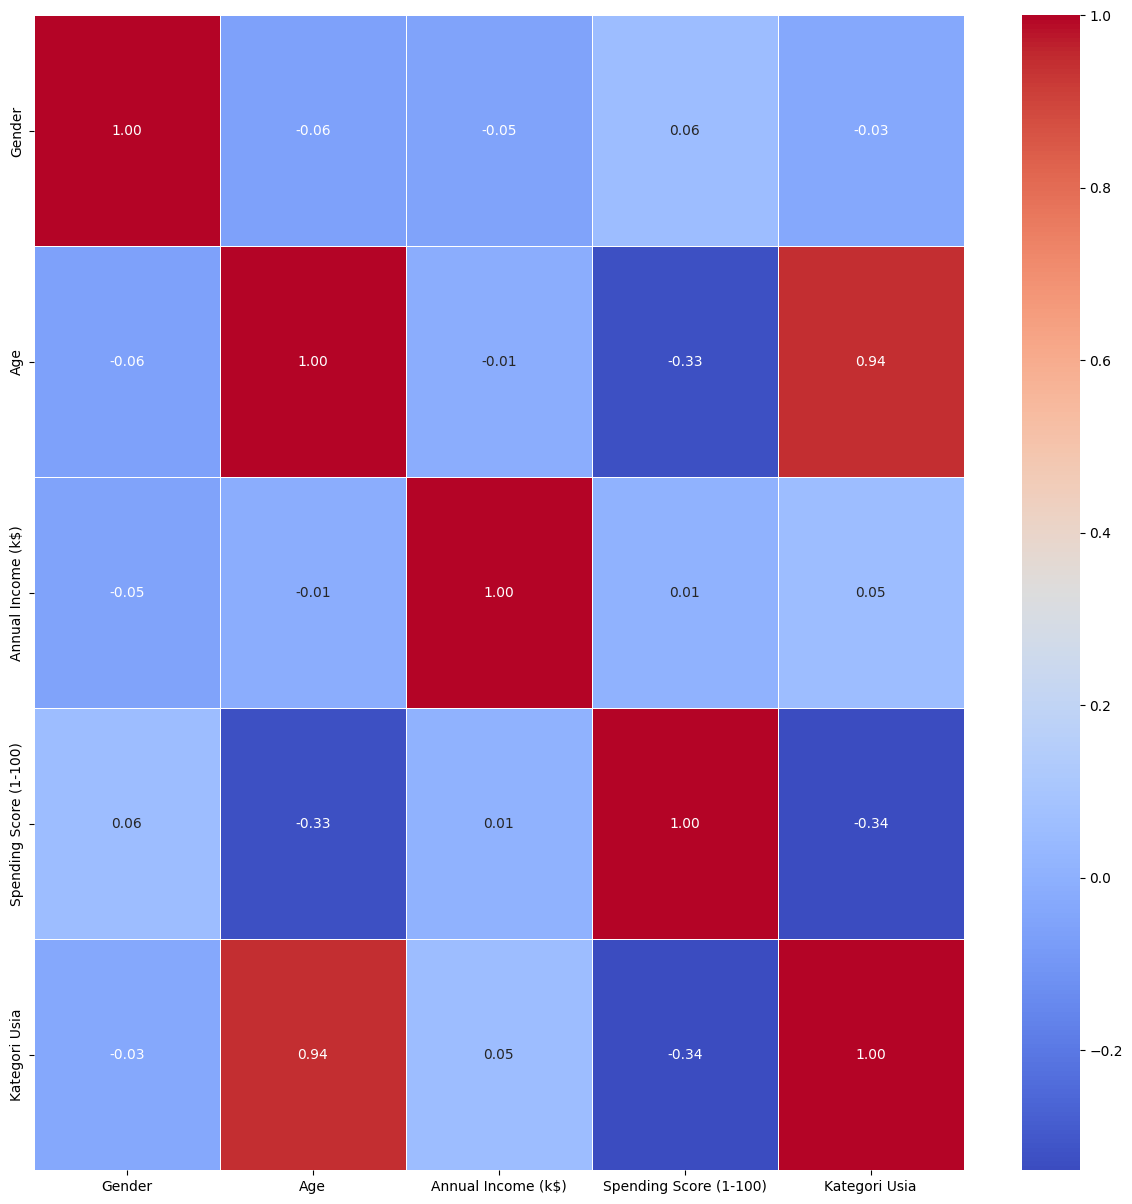

In [21]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

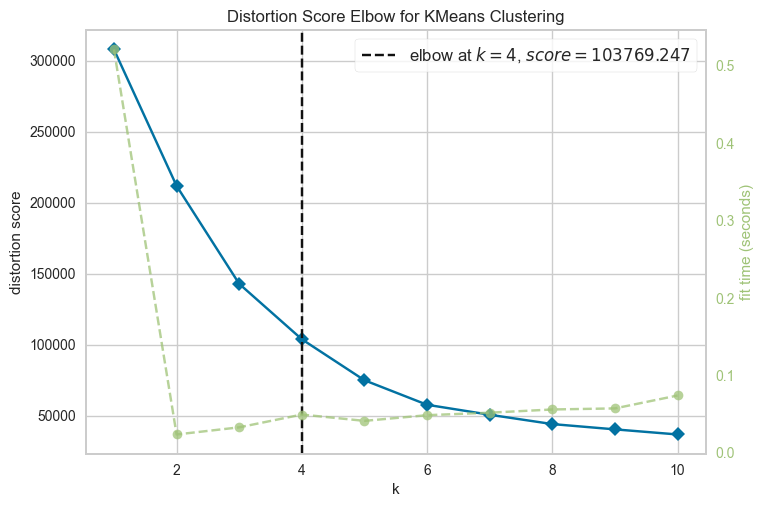

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualizer=KElbowVisualizer(KMeans(),k=(1,11))
visualizer.fit(df)
visualizer.poof()

#plt.figure(figsize=(10, 6), dpi=20)
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, y_kmeans)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.40570310504041257


PLOT CUSTER

In [25]:
import numpy as np
df_numpy = np.array(df)

<Figure size 800x550 with 0 Axes>

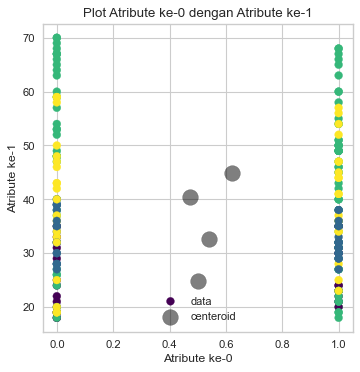

<Figure size 800x550 with 0 Axes>

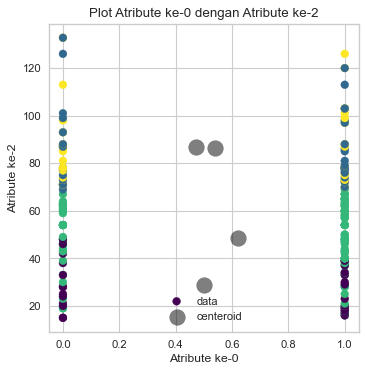

<Figure size 800x550 with 0 Axes>

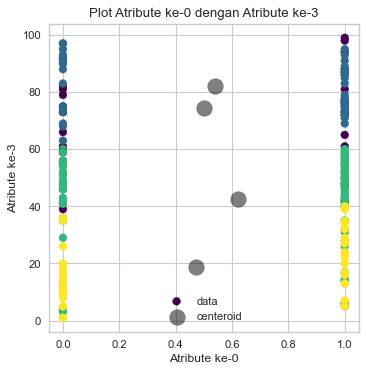

<Figure size 800x550 with 0 Axes>

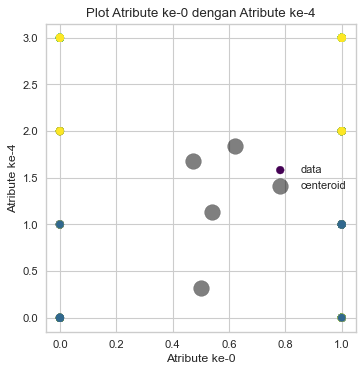

<Figure size 800x550 with 0 Axes>

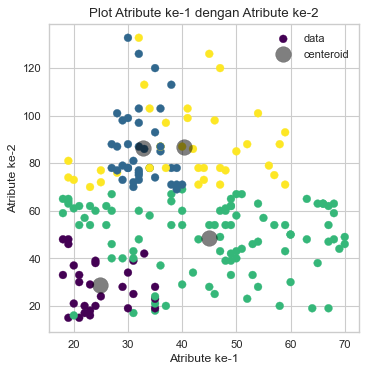

<Figure size 800x550 with 0 Axes>

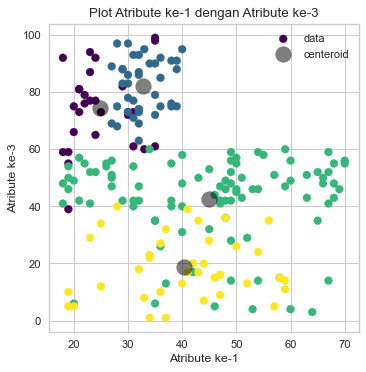

<Figure size 800x550 with 0 Axes>

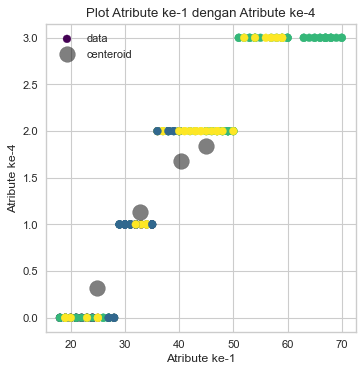

<Figure size 800x550 with 0 Axes>

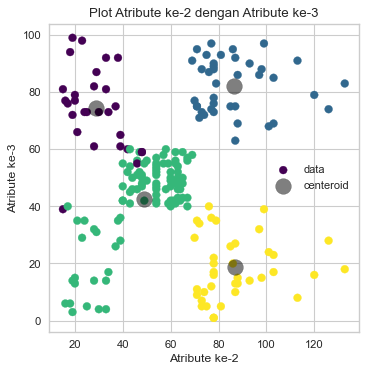

<Figure size 800x550 with 0 Axes>

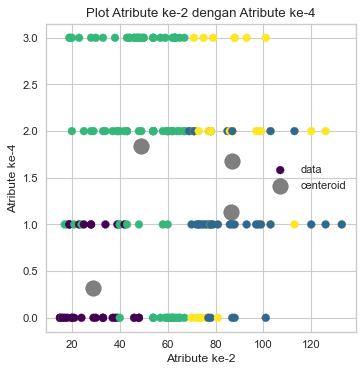

<Figure size 800x550 with 0 Axes>

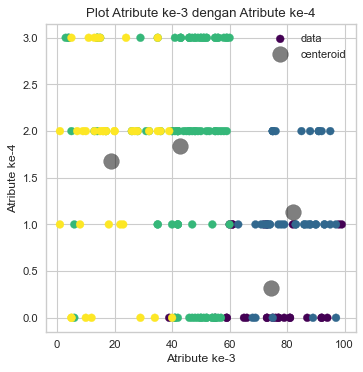

In [26]:
kolomdf=df_numpy.shape[1]
dfX=np.array(df_numpy)
f=0
for i in range (kolomdf-1):
    for j in range (i+1,kolomdf):
      plt.figure(f)
      f=f+1
      plt.figure(figsize=(5, 5), dpi=80)
      plt.scatter(dfX[:,i], dfX[:, j], c=y_kmeans, s=50, cmap='viridis', label='data')
      centers = kmeans.cluster_centers_
      plt.scatter(centers[:, i], centers[:, j], c='black', s=200, alpha=0.5, label='centeroid');
      xlabel='Atribute ke-'+str(i)
      ylabel='Atribute ke-'+str(j)
      titel='Plot '+str(xlabel)+' dengan '+str(ylabel)

      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      plt.title(titel)
      plt.legend()
      plt.show()

In [27]:
df_plot = df
df_plot['cluster'] = y_kmeans

In [28]:
df_plot

,Gender,Age,Annual Income (k$),Spending Score (1-100),Kategori Usia,cluster
0,0,19,15.00,39,0,0
1,0,21,15.00,81,0,0
2,1,20,16.00,6,0,2
3,1,23,16.00,77,0,0
4,1,31,17.00,40,1,2
...,...,...,...,...,...,...
195,1,35,120.00,79,1,1
196,1,45,126.00,28,2,3
197,0,32,126.00,74,1,1
198,0,32,132.75,18,1,3


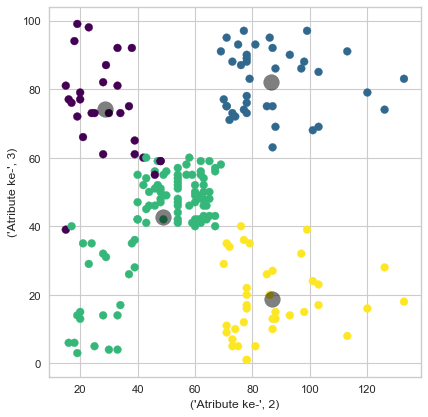

In [29]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(df_scatter[:,2], df_scatter[:,3], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:,3], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='Atribute ke-',2
ylabel='Atribute ke-',3
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [30]:
from sklearn.metrics.cluster import homogeneity_score
hom1= homogeneity_score(df_plot['Annual Income (k$)'],df_plot['Spending Score (1-100)'])
print('Homogenity antara Alcohol dengan Proline  :', hom1)

Homogenity antara Alcohol dengan Proline  : 0.7446134951347404


c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [31]:
import plotly.express as px
fig = px.scatter_3d(df_plot, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='cluster', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

CENTROID PLOT 

In [32]:
kmeans.fit(df_plot[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
df_plot['cluster'] = kmeans.labels_

c:\Users\DEDEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [33]:
centroidsasli = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'])
import plotly.express as px
fig = px.scatter_3d(df_plot, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='cluster', opacity=1)
fig.add_trace(px.scatter_3d(centroidsasli, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',color_discrete_map={'Annual Income (k$)': 'red', 'Spending Score (1-100)': 'red', 'Age': 'red', 'centroids': 'black'}, size_max=10).data[0])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

HASIL DARI CLUSTERING 